In [4]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

/home/pol/dev/tfg/lib64/python3.12/site-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [5]:
# Parameters
omega = 2*np.pi*1.1
Q = 1e7
gamma = omega / Q

hbar = 1.05457182e-34 * 1e9**2 / 1e6
kB = 1.380649e-23 * 1e9**2 / 1e6**2
T = 1e-3
n = 1/(np.exp(hbar*omega/(kB*T))-1)
k = gamma * n


N = 50

In [6]:
# Operators and initial state
a = qt.destroy(N)
at = a.dag()
H = omega*at*a
x = a+at

psi0 = qt.basis(N,0)

In [7]:
# Jump operators 
J = [np.sqrt(gamma*(n+1))*a, np.sqrt(gamma*n)*at, np.sqrt(k)*x]


In [10]:
# Steady State
final_state = qt.steadystate(H,J)
qt.expect(a.dag()*a,final_state) - n

0.6430285631296044

In [11]:
# Time integration
tspan = np.linspace(0,1e3,10000)

In [13]:
sol = qt.mesolve(H,psi0,tspan,J,[a.dag()*a])

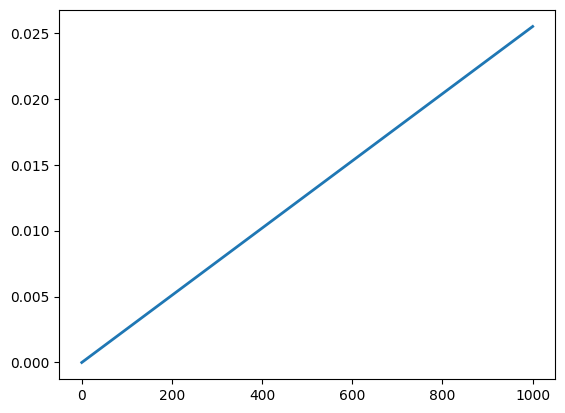

In [14]:
plt.plot(tspan,sol.expect[0], lw = 2)

In [18]:
qt.shape(tspan)

(10000,)